<a href="https://colab.research.google.com/github/T-Naveen-2308/IIITH-FMML-Assignments/blob/main/Week_3_Assignment_Extracting_Features_from_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

In [ ]:
!pip install wikipedia

import re
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
from collections import Counter

# Part 1: Features of text

Computures can't understand text. They can only process numbers. So, the logical first step in any attempt to analyze text is to convert it into numbers. This process is called **feature extraction** or **vectorization**. In this lab, we will try some simple methods for feature extraction.

First, let us download a 2 documents from Wikipedia in two different languages, English and French. We will then extract features from the text in these documents.

In [ ]:
topic1 = "Quantum Mechanics"
topic2 = "Renaissance Art"

wikipedia.set_lang("en")

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("fr")

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like in English:

In [ ]:
eng2[:500]

'Renaissance art (1350 – 1620) is the painting, sculpture, and decorative arts of the period of European history known as the Renaissance, which emerged as a distinct style in Italy in about AD 1400, in parallel with developments which occurred in philosophy, literature, music, science, and technology. Renaissance art took as its foundation the art of Classical antiquity, perceived as the noblest of ancient traditions, but transformed that tradition by absorbing recent developments in the art of '

This is what the text looks like in French:

In [ ]:
fr2[:500]

"L'art de la Renaissance ou Renaissance artistique est une composante importante de la période de la Renaissance du renouveau humaniste de la littérature, des arts et des sciences qui se produisit en Europe du XIVe au XVIe siècle.\nUn des aspects essentiels de la Renaissance en tant que période est le renouvellement des thèmes et de l'art en Europe après le Moyen Âge. Donner des repères chronologiques précis pour ce mouvement artistique est difficile. Il est couramment admis que la Renaissance art"

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
    text = text.lower()
    text = re.sub(
        r"[^a-z]", "", text
    )
    return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
eng2[:500]

'renaissanceartisthepaintingsculptureanddecorativeartsoftheperiodofeuropeanhistoryknownastherenaissancewhichemergedasadistinctstyleinitalyinaboutadinparallelwithdevelopmentswhichoccurredinphilosophyliteraturemusicscienceandtechnologyrenaissancearttookasitsfoundationtheartofclassicalantiquityperceivedasthenoblestofancienttraditionsbuttransformedthattraditionbyabsorbingrecentdevelopmentsintheartofnortherneuropeandbyapplyingcontemporaryscientificknowledgealongwithrenaissancehumanistphilosophyitsprea'

In [ ]:
fr2[:500]

'lartdelarenaissanceourenaissanceartistiqueestunecomposanteimportantedelapriodedelarenaissancedurenouveauhumanistedelalittraturedesartsetdessciencesquiseproduisiteneuropeduxiveauxviesicleundesaspectsessentielsdelarenaissanceentantquepriodeestlerenouvellementdesthmesetdelarteneuropeaprslemoyengedonnerdesrepreschronologiquesprcispourcemouvementartistiqueestdifficileilestcourammentadmisquelarenaissanceartistiquecommenceenitalieauxivesiclepuissediffusedansleresteducontinentdesrythmesetdesdegrsdiffren'

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
def get_ngram_freq(ngram):
    keys = [''.join(i) for i in ngram.keys()]
    values = list(ngram.values())
    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

Let us compare the histograms of English pages and French pages. Can you spot a difference?

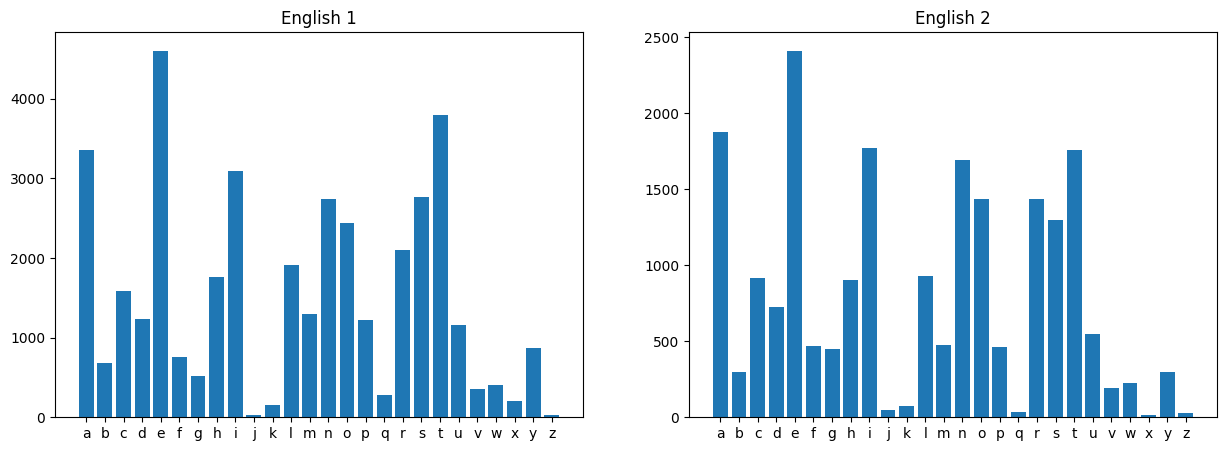

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_eng1 = Counter(ngrams(eng1, 1))
keys, values = get_ngram_freq(unigram_eng1)
axs[0].bar(keys, values)
axs[0].set_title("English 1")

unigram_eng2 = Counter(ngrams(eng2, 1))
keys, values = get_ngram_freq(unigram_eng2)
axs[1].bar(keys, values)
axs[1].set_title("English 2")
plt.show()

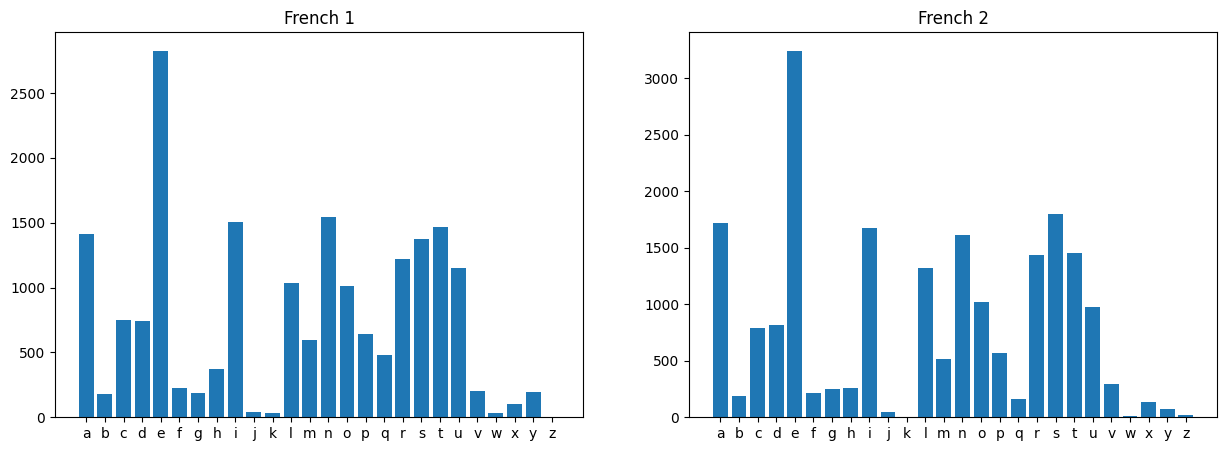

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_fr1 = Counter(ngrams(fr1, 1))
keys, values = get_ngram_freq(unigram_fr1)
axs[0].bar(keys, values)
axs[0].set_title("French 1")

unigram_fr2 = Counter(ngrams(fr2, 1))
keys, values = get_ngram_freq(unigram_fr2)
axs[1].bar(keys, values)
axs[1].set_title("French 2")
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

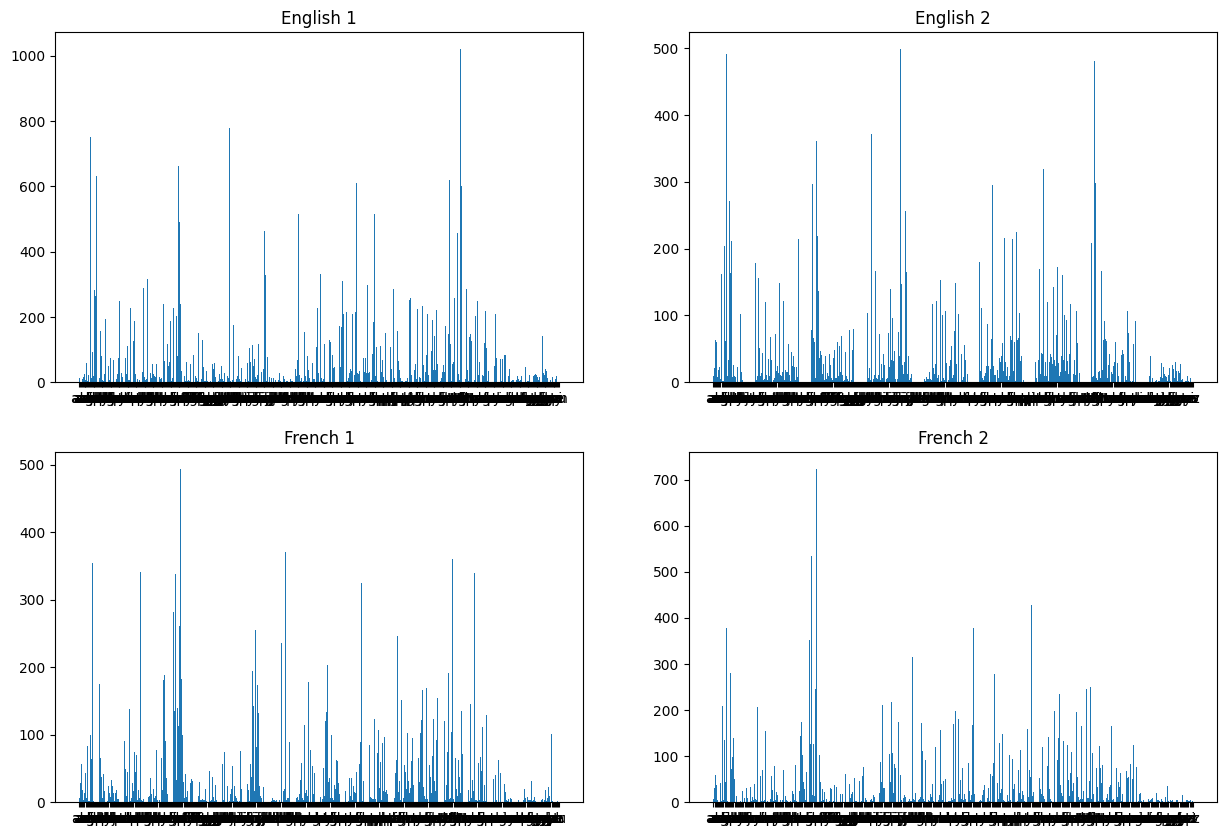

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(bigram_eng1)
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("English 1")

bigram_eng2 = Counter(ngrams(eng2, 2))
keys, values = get_ngram_freq(bigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

bigram_fr1 = Counter(ngrams(fr1, 2))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 2))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

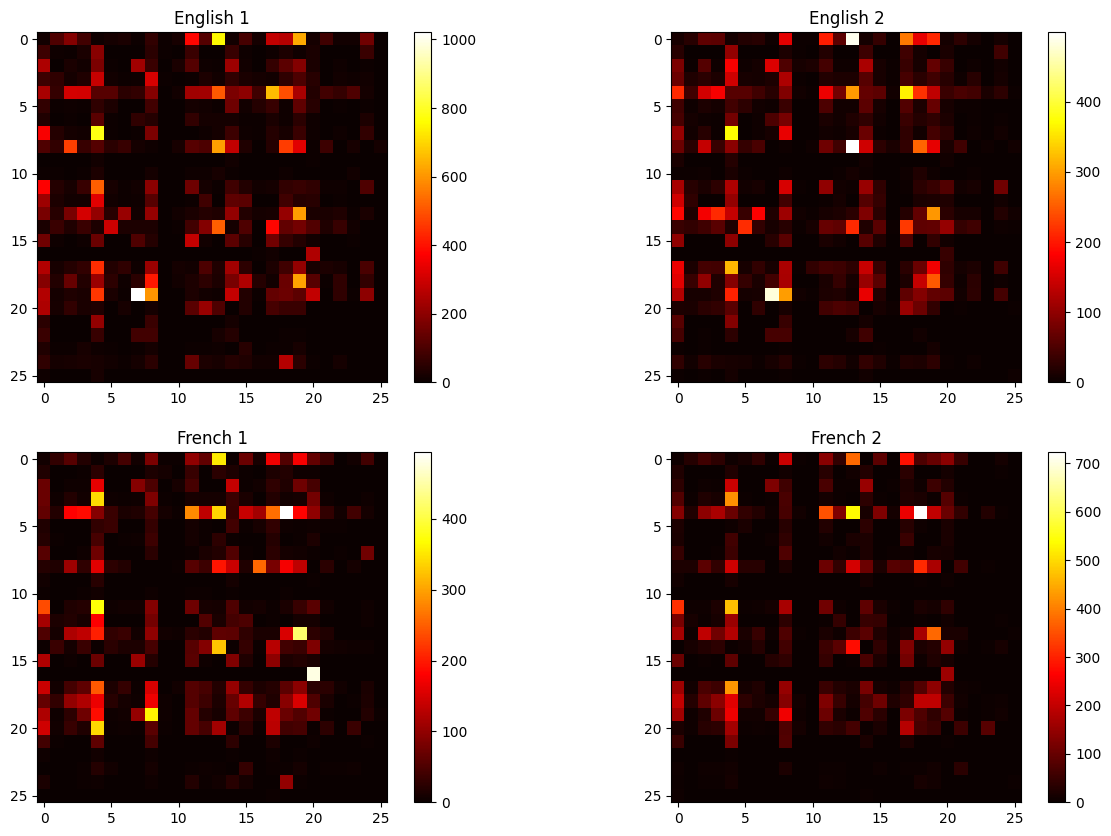

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1_freq = get_2D_ngram_freq(bigram_eng1)
fig.colorbar(axs[0, 0].imshow(bigram_eng1_freq, cmap="hot"), ax=axs[0, 0])
axs[0, 0].set_title("English 1")

bigram_eng2_freq = get_2D_ngram_freq(bigram_eng2)
fig.colorbar(axs[0, 1].imshow(bigram_eng2_freq, cmap="hot"), ax=axs[0, 1])
axs[0, 1].set_title("English 2")

bigram_fr1_freq = get_2D_ngram_freq(bigram_fr1)
fig.colorbar(axs[1, 0].imshow(bigram_fr1_freq, cmap="hot"), ax=axs[1, 0])
axs[1, 0].set_title("French 1")

bigram_fr2_freq = get_2D_ngram_freq(bigram_fr2)
fig.colorbar(axs[1, 1].imshow(bigram_fr2_freq, cmap="hot"), ax=axs[1, 1])
axs[1, 1].set_title("French 2")
plt.show()

Let us look at the top 10 ngrams for each text.

In [ ]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))


def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [ ]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)


English 1:
('t', 'h') : 1021.0
('h', 'e') : 779.0
('a', 'n') : 752.0
('e', 'r') : 662.0
('a', 't') : 633.0
('s', 't') : 619.0
('i', 'n') : 615.0
('n', 't') : 611.0
('t', 'i') : 602.0
('o', 'n') : 515.0

English 2:
('i', 'n') : 499.0
('a', 'n') : 491.0
('t', 'h') : 481.0
('h', 'e') : 372.0
('e', 'r') : 361.0
('r', 'e') : 319.0
('t', 'i') : 299.0
('e', 'n') : 297.0
('n', 't') : 295.0
('a', 'r') : 272.0

French 1:
('e', 's') : 494.0
('q', 'u') : 479.0
('n', 't') : 421.0
('l', 'e') : 371.0
('t', 'i') : 361.0
('a', 'n') : 354.0
('d', 'e') : 342.0
('u', 'e') : 340.0
('e', 'n') : 338.0
('o', 'n') : 325.0

French 2:
('e', 's') : 723.0
('e', 'n') : 534.0
('l', 'e') : 469.0
('r', 'e') : 427.0
('d', 'e') : 419.0
('a', 'n') : 378.0
('n', 't') : 377.0
('e', 'l') : 351.0
('l', 'a') : 316.0
('i', 's') : 309.0


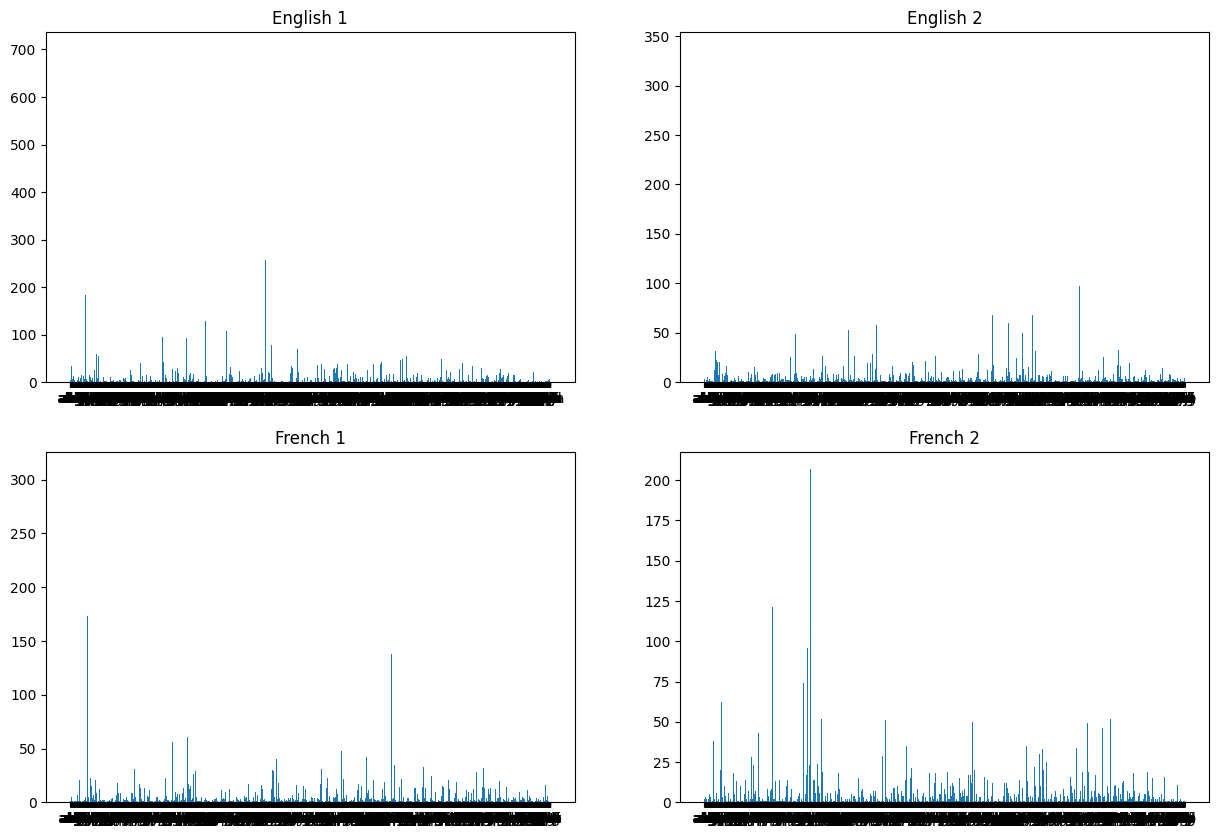

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1 = Counter(ngrams(eng1, 3))
keys, values = get_ngram_freq(bigram_eng1)
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("English 1")

bigram_eng2 = Counter(ngrams(eng2, 3))
keys, values = get_ngram_freq(bigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

bigram_fr1 = Counter(ngrams(fr1, 3))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 3))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

In [ ]:
def get_3D_ngram_freq(ngram):
    freq = np.zeros((26, 26, 26))
    for ii in range(26):
        for jj in range(26):
            for kk in range(26):
                freq[ii, jj, kk] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj), chr(ord("a") + kk))]
    return freq

In [ ]:
bigram_eng1_freq = get_3D_ngram_freq(bigram_eng1)

bigram_eng2_freq = get_3D_ngram_freq(bigram_eng2)

bigram_fr1_freq = get_3D_ngram_freq(bigram_fr1)

bigram_fr2_freq = get_3D_ngram_freq(bigram_fr2)

In [ ]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / (26 * 26))
    j = int((ind % (26 * 26)) / 26)
    k = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j), chr(ord("a") + k))


def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [ ]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)


English 1:
('t', 'h', 'e') : 701.0
('i', 'o', 'n') : 258.0
('t', 'i', 'o') : 236.0
('q', 'u', 'a') : 231.0
('a', 'n', 't') : 225.0
('n', 't', 'u') : 214.0
('t', 'u', 'm') : 204.0
('e', 'n', 't') : 203.0
('u', 'a', 'n') : 198.0
('a', 't', 'i') : 194.0

English 2:
('t', 'h', 'e') : 337.0
('a', 'n', 'd') : 170.0
('i', 'n', 'g') : 138.0
('i', 'n', 't') : 134.0
('n', 'c', 'e') : 111.0
('s', 'a', 'n') : 97.0
('t', 'i', 'n') : 92.0
('a', 'r', 't') : 91.0
('a', 'n', 'c') : 90.0
('r', 'e', 'n') : 87.0

French 1:
('q', 'u', 'e') : 310.0
('i', 'q', 'u') : 256.0
('a', 'n', 't') : 173.0
('e', 'n', 't') : 143.0
('q', 'u', 'a') : 138.0
('n', 't', 'i') : 136.0
('i', 'o', 'n') : 133.0
('u', 'a', 'n') : 131.0
('t', 'i', 'q') : 124.0
('t', 'i', 'o') : 116.0

French 2:
('l', 'e', 's') : 207.0
('e', 'n', 't') : 207.0
('r', 'e', 'n') : 141.0
('n', 'c', 'e') : 140.0
('e', 'l', 'a') : 139.0
('q', 'u', 'e') : 121.0
('d', 'e', 's') : 121.0
('d', 'e', 'l') : 120.0
('a', 'i', 's') : 119.0
('a', 'n', 'c') : 116.0

# Part 2: Written numbers

We've seen how to extract features from text. Now let us see how to extract features from images. We will use the MNIST dataset which contains images of handwritten numbers. Each image is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

In [ ]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y == 5, :, :]
no0 = train_X[train_y == 2, :, :]

Let us visualize a few images here:

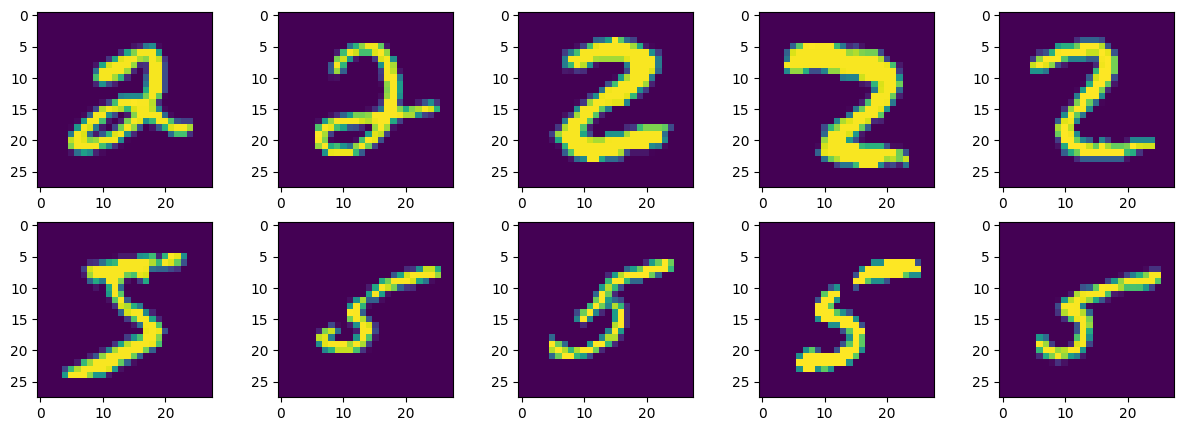

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for ii in range(5):
    axs[0, ii].imshow(no0[ii, :, :])

for ii in range(5):
    axs[1, ii].imshow(no1[ii, :, :])
plt.show()

Now, let us start with a simple feature: the sum of all pixels. Let's see how good this feature is.

In [ ]:
sum1 = np.sum(no1 > 0, (1, 2))
sum0 = np.sum(no0 > 0, (1, 2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

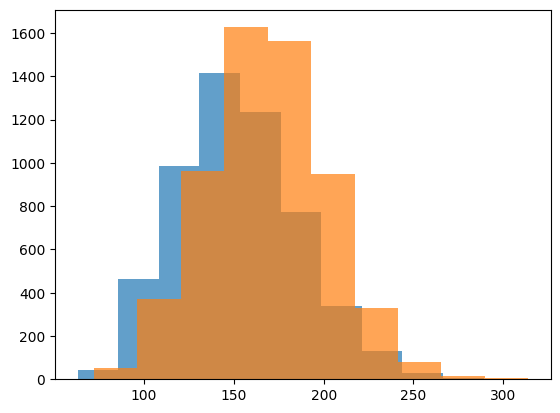

In [ ]:
plt.hist(sum1, alpha=0.7)
plt.hist(sum0, alpha=0.7)
plt.show()

In [ ]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )  # for every row, add up all the rows above it.
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole

Visualize a few. First row has the original zero number images and the second row has the hole pixels. Thrid row has original one number images and the last row has corresponding hole pixels which are non-existent, as expected.

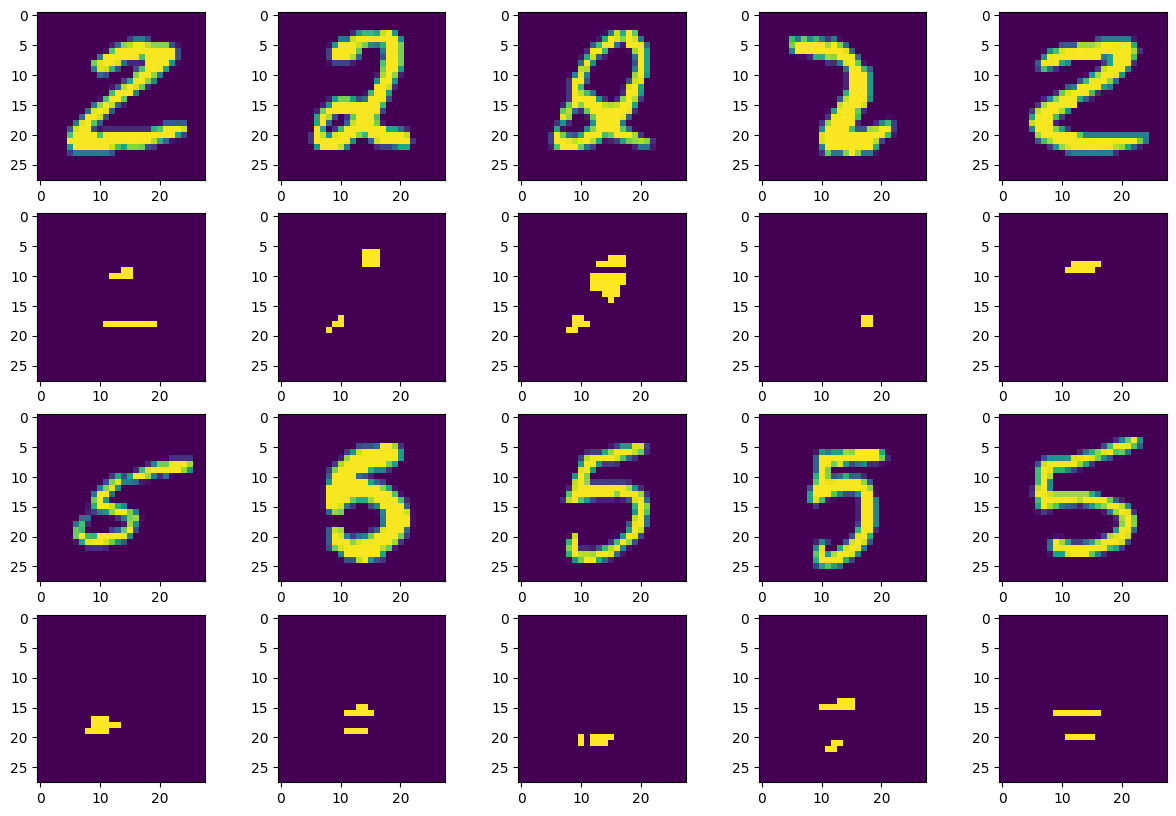

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHolePixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHolePixels(no1[idx, :, :]))

Now let us plot the number of hole pixels and see how this feature behaves

(array([3.463e+03, 1.582e+03, 6.110e+02, 2.050e+02, 5.300e+01, 3.300e+01,
        7.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  12.4,  24.8,  37.2,  49.6,  62. ,  74.4,  86.8,  99.2,
        111.6, 124. ]),
 <BarContainer object of 10 artists>)

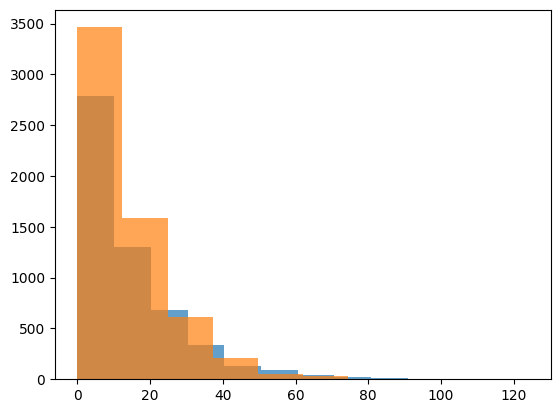

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7)
plt.hist(hole0, alpha=0.7)

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull

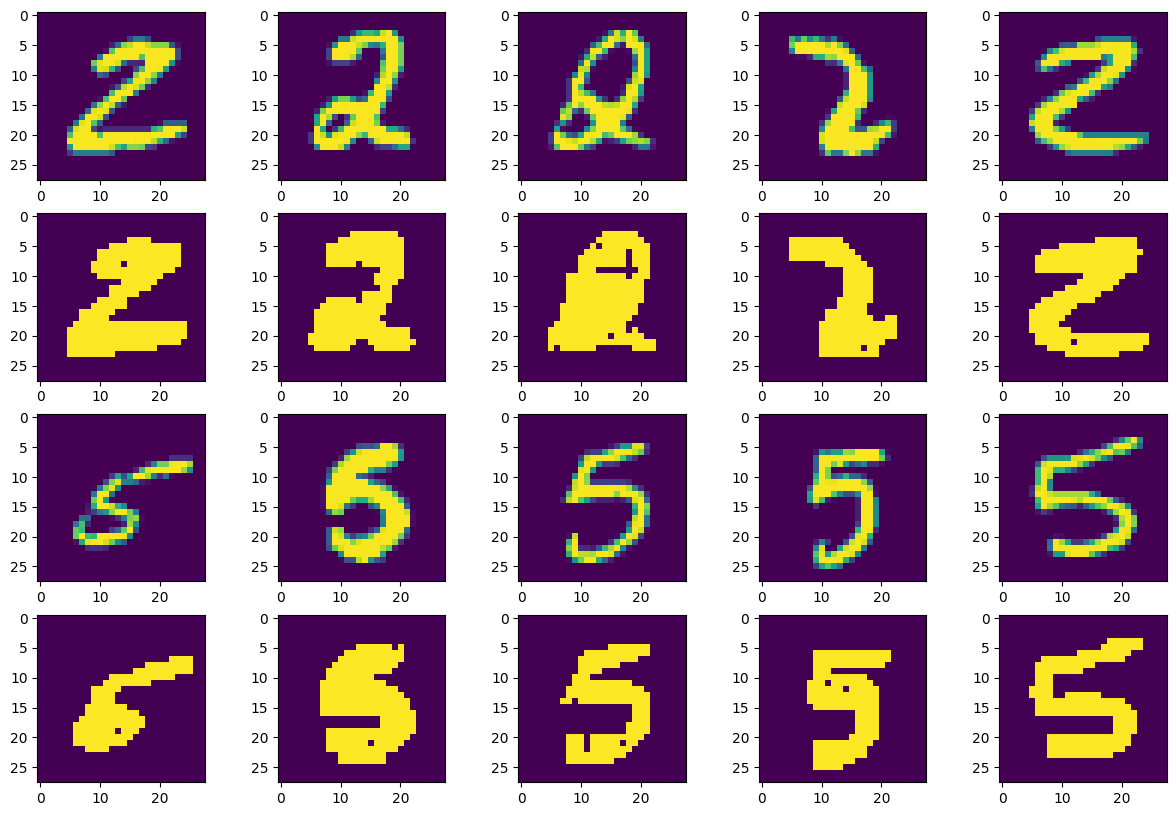

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHullPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHullPixels(no1[idx, :, :]))

Plotting the number of hull pixels versus the digit:

(array([  46.,  371., 1000., 1610., 1635.,  931.,  294.,   59.,    9.,
           3.]),
 array([ 70. ,  97.7, 125.4, 153.1, 180.8, 208.5, 236.2, 263.9, 291.6,
        319.3, 347. ]),
 <BarContainer object of 10 artists>)

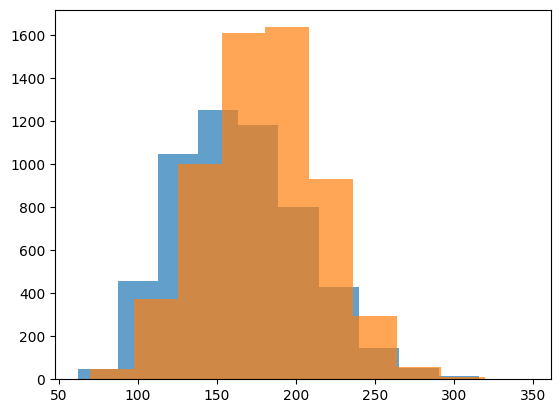

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7)
plt.hist(hull0, alpha=0.7)

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

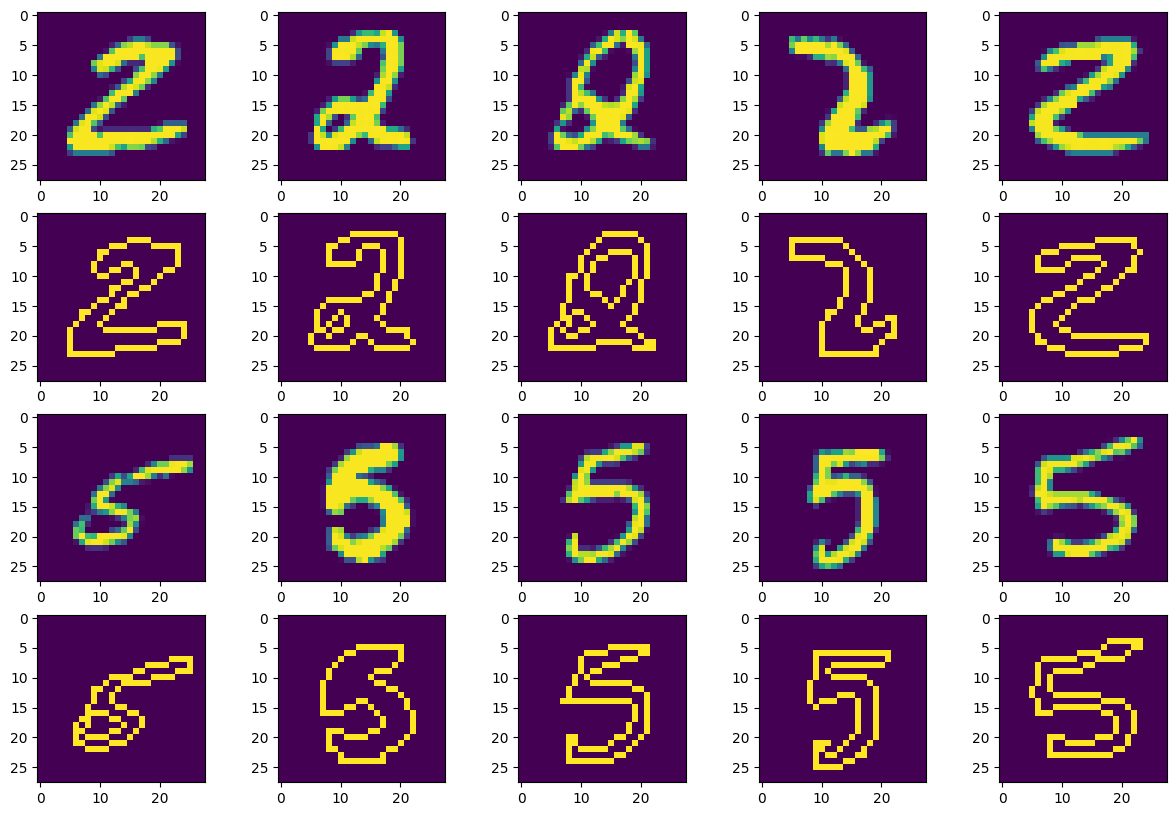

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getBoundaryPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getBoundaryPixels(no1[idx, :, :]))

(array([  25.,  198.,  716., 1628., 1683., 1086.,  442.,  154.,   24.,
           2.]),
 array([ 46. ,  53.9,  61.8,  69.7,  77.6,  85.5,  93.4, 101.3, 109.2,
        117.1, 125. ]),
 <BarContainer object of 10 artists>)

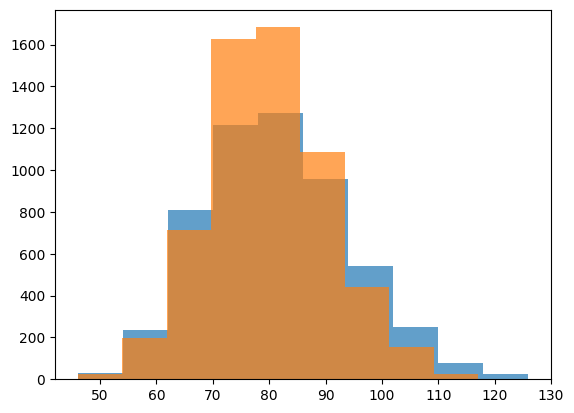

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7)
plt.hist(bound0, alpha=0.7)

What will happen if we plot two features together?

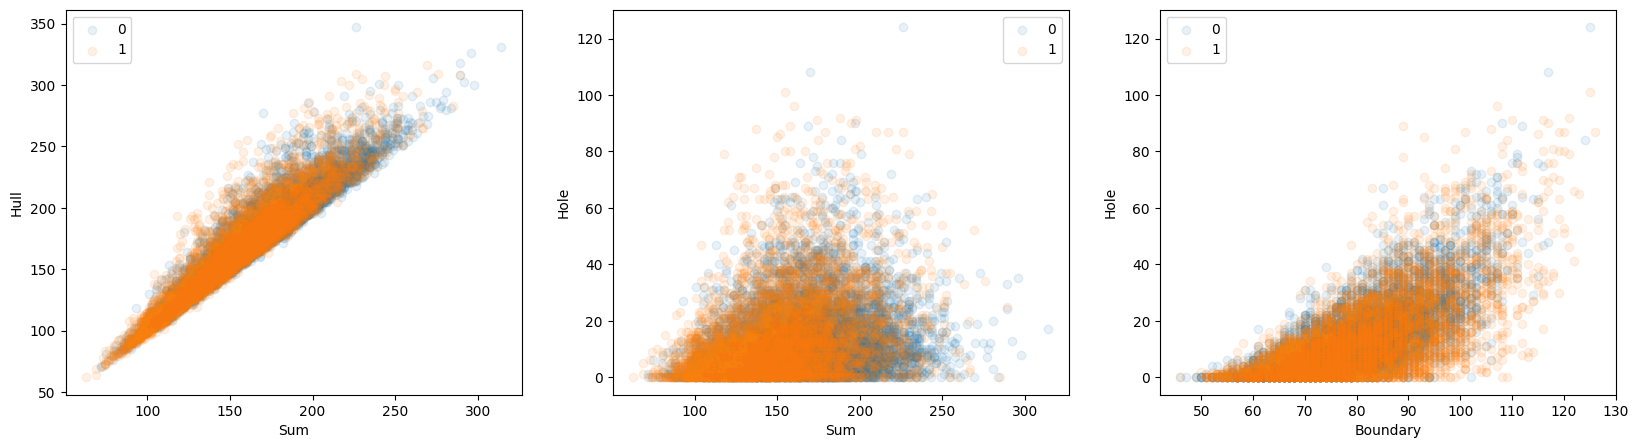

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(sum0, hull0, alpha=0.1)
axs[0].scatter(sum1, hull1, alpha=0.1)
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(["0", "1"])

axs[1].scatter(sum0, hole0, alpha=0.1)
axs[1].scatter(sum1, hole1, alpha=0.1)
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend(["0", "1"])

axs[2].scatter(bound0, hole0, alpha=0.1)
axs[2].scatter(bound1, hole1, alpha=0.1)
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(["0", "1"])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ["class 1"] * len(sum1)
cl0 = ["class 0"] * len(sum0)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole0, hole0)),
            np.concatenate((sum1, sum0)),
            np.concatenate((bound1, bound0)),
            np.concatenate((cl1, cl0)),
        )
    ),
    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()